In [97]:
%load_ext autoreload
%autoreload 2
from qiskit_shor import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
from qiskit_aer import AerSimulator

In [99]:
# from qiskit_ibm_runtime import QiskitRuntimeService

# QiskitRuntimeService.save_account(channel="ibm_quantum", token='09df633b74dd007ffcadc2567fe0a934235d150e0567890bc94888ce7e852767aff8a15e17af4b68013ee87bbd7cf07b01b477752eed996b2d4ed9b8163c3063', overwrite=True)
# service = QiskitRuntimeService()
# backend = service.backend('ibm_brisbane')

In [100]:
backend = AerSimulator()
shor_circuit = Shor(backend)
backend.name

'aer_simulator'

In [101]:
# N = 3
# a = 2
# circuit = shor_circuit.factor(N, a)
# circuit.draw(output="mpl")

# # if job.done:
# #     print(len(job.result()[0].data.m.get_counts()))

# #     result = shor_circuit.package_result(job, N, a)
# #     result.quantum_time = quantum_time

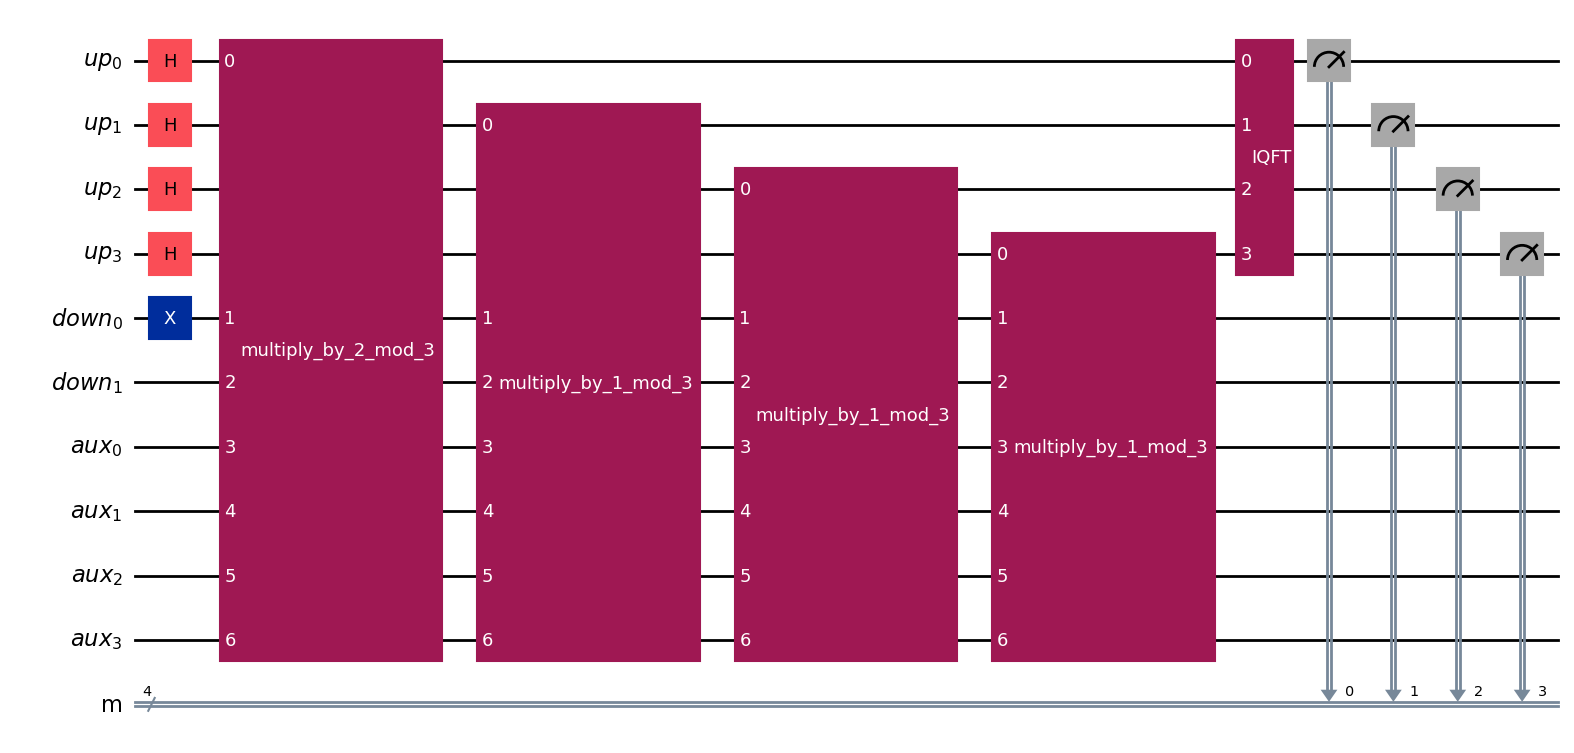

In [102]:
circuit = shor_circuit.construct_circuit(3, 2, True)
circuit.draw(output='mpl')

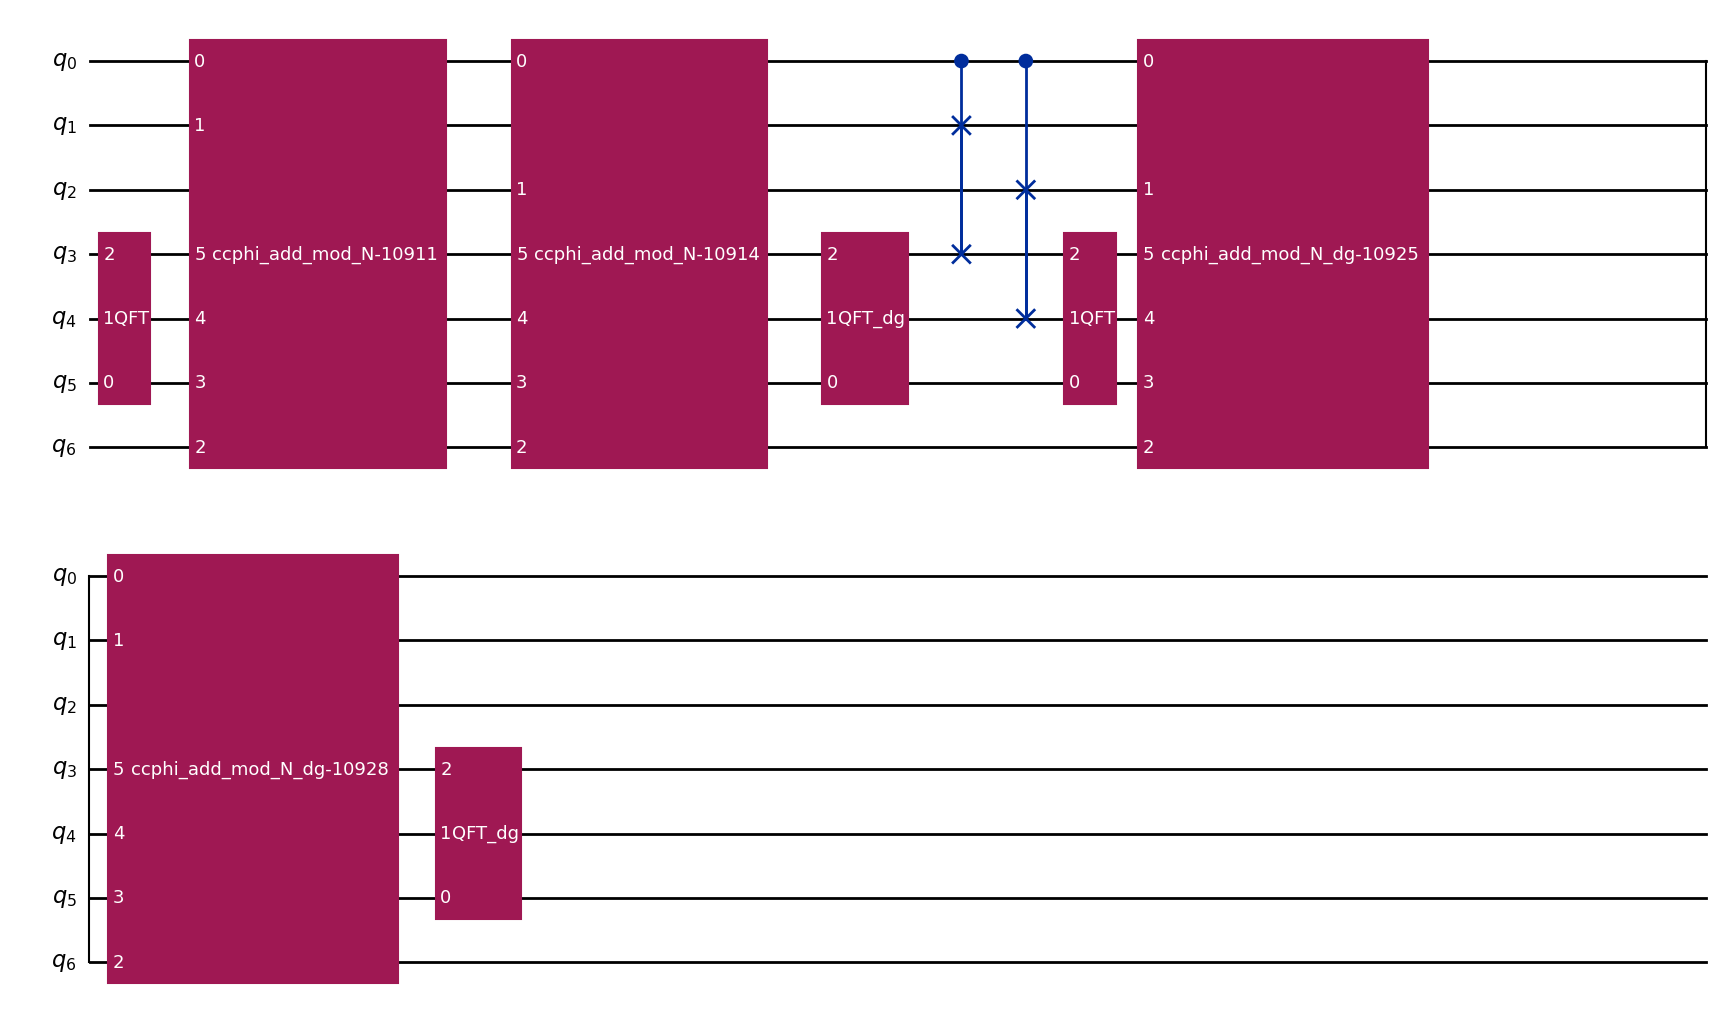

In [103]:
shor_circuit.multiple_c.draw(output='mpl')

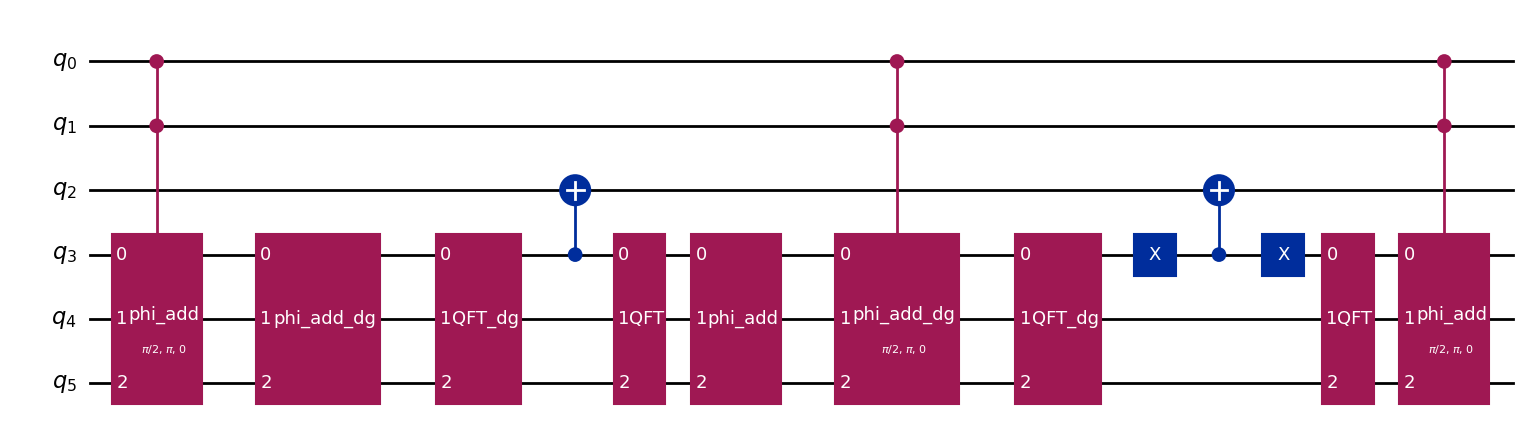

In [104]:
shor_circuit.ccphi.draw(output='mpl')

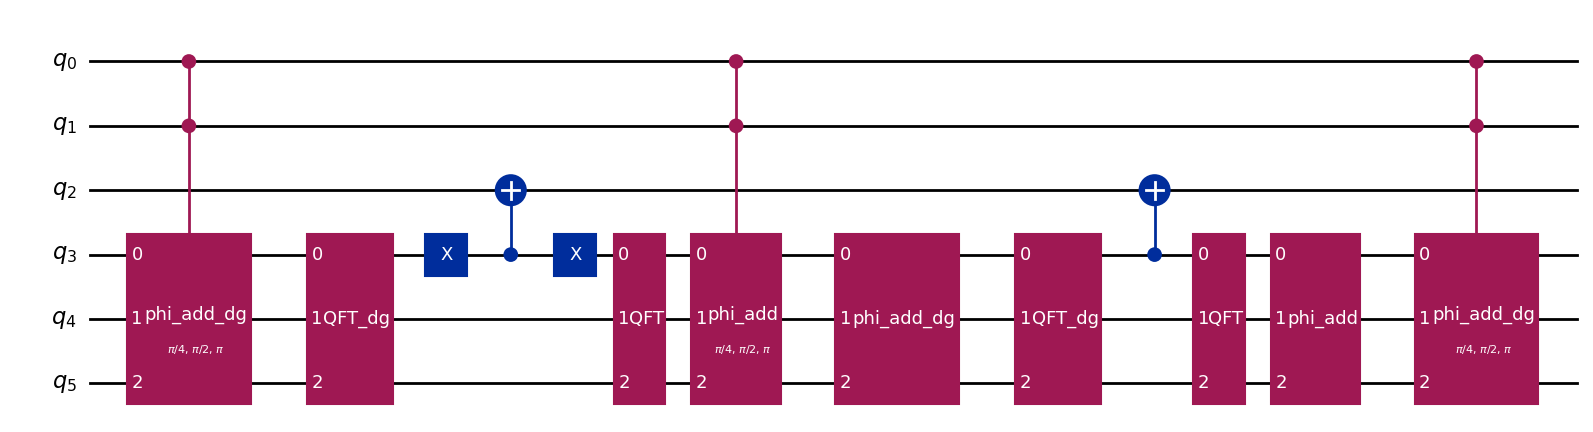

In [105]:
shor_circuit.ccphi_inv.draw(output='mpl')

In [106]:
print('successful counts', result.successful_counts)
print('total counts', result.total_counts)
print('percentage', result.successful_counts/result.total_counts)
print('quantum time', result.quantum_time)
print('classical time', result.classical_time)

NameError: name 'result' is not defined

In [124]:
# from qiskit.visualization import plot_histogram

# plot_histogram(result.counts)